# Regularized multinomial logit model (using the LASSO penalty) and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv("mnist.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [37]:
X = df.drop(["label"], axis=1)
y = df["label"].to_numpy()

[1 0 1 ... 7 6 9]


In [100]:
# Set random_state to 10 for reproducability. Split 42000: 5000/37000
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=10, test_size=37000)

X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [146]:
# using saga because lbfgs does not support L1 (lasso) penalty
# tolerance is higher to allow for faster convergence
# cv: folds, C: complexity
LR = LogisticRegressionCV(solver='saga', 
                        multi_class='multinomial', 
                        penalty='l1', 
                        cv=10,
                        tol=0.1, 
                        Cs=100, 
                        random_state=10,
                        verbose=1,
                        n_jobs=-1)

LR_result = LR.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 1 seconds
convergence after 3 epochs took 1 secondsconvergence after 3 epochs took 1 seconds

convergence after 3 epochs took 1 seconds
convergence after 3 epochs took 1 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 1 seconds
convergence after 3 epochs took 1 seconds
convergence after 5 epochs took 2 seconds
convergence after 3 epochs took 1 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 1 seconds
convergence after 6 epochs took 2 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 

convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 

convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 

convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 

convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 1 epochs took 0 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 1 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.8min remaining:  1.2min


convergence after 3 epochs took 1 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 6 epochs took 2 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 1 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 1 

convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished


In [148]:
LR_result.scores_[1].mean(axis=0).max()

0.8997829949790009

In [160]:
LR_result.C_

array([200.92330026, 200.92330026, 200.92330026, 200.92330026,
       200.92330026, 200.92330026, 200.92330026, 200.92330026,
       200.92330026, 200.92330026])

In [178]:
# Test accuracy
score_LR = LR.score(X_test, y_test)

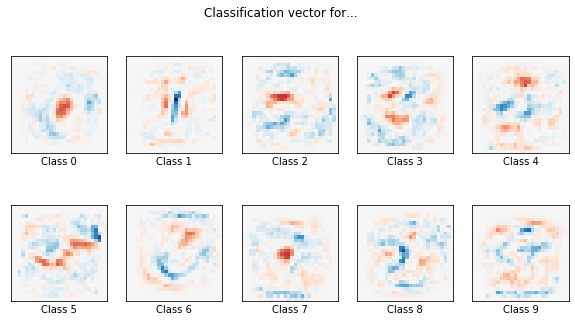

In [156]:
# copied from internet: 
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

coef = LR.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

plt.show()

# Support vector machines

In [121]:
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    gammas = [0.0001, 0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid = GridSearchCV(SVC(kernel='rbf'), param_grid, n_jobs=-1, cv=nfolds, verbose=1)
    grid_result = grid.fit(X, y)
    grid.best_params_
    return grid_result

svm_grid_result = svc_param_selection(X_train, y_train, 10)

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 56.4min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 85.5min finished


In [122]:
print("Best: %f using %s" % (svm_grid_result.best_score_, svm_grid_result.best_params_))
means_svm = svm_grid_result.cv_results_['mean_test_score']
stds_svm = svm_grid_result.cv_results_['std_test_score']
params_svm = svm_grid_result.cv_results_['params']
for mean, stdev, param in zip(means_svm, stds_svm, params_svm):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.931200 using {'C': 3, 'gamma': 0.001}
0.116200 (0.000678) with: {'C': 0.0001, 'gamma': 0.0001}
0.116200 (0.000678) with: {'C': 0.0001, 'gamma': 0.001}
0.116200 (0.000678) with: {'C': 0.0001, 'gamma': 0.01}
0.116200 (0.000678) with: {'C': 0.0001, 'gamma': 0.1}
0.116200 (0.000678) with: {'C': 0.0001, 'gamma': 1}
0.116200 (0.000678) with: {'C': 0.001, 'gamma': 0.0001}
0.116200 (0.000678) with: {'C': 0.001, 'gamma': 0.001}
0.116200 (0.000678) with: {'C': 0.001, 'gamma': 0.01}
0.116200 (0.000678) with: {'C': 0.001, 'gamma': 0.1}
0.116200 (0.000678) with: {'C': 0.001, 'gamma': 1}
0.116200 (0.000678) with: {'C': 0.01, 'gamma': 0.0001}
0.309200 (0.011968) with: {'C': 0.01, 'gamma': 0.001}
0.116200 (0.000678) with: {'C': 0.01, 'gamma': 0.01}
0.116200 (0.000678) with: {'C': 0.01, 'gamma': 0.1}
0.116200 (0.000678) with: {'C': 0.01, 'gamma': 1}
0.612400 (0.017966) with: {'C': 0.1, 'gamma': 0.0001}
0.851000 (0.015574) with: {'C': 0.1, 'gamma': 0.001}
0.313000 (0.006486) with: {'C': 0.1, 'ga

In [157]:
SVC = SVC(kernel="rbf",
          gamma=0.001,
          C=3,
          random_state=10)

SVC_result = SVC.fit(X_train, y_train)

In [180]:
score_SVM = SVC.score(X_test, y_test)

# Feed-forward neural networks

In [84]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold

# Parameters
batch_size = 128
num_classes = 10
epochs = 20
folds = 10

# Set random state to 10, making sure the folds are always the same during validation
# kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=10)
# cvscores = []

# for train_idx, validation_idx in kfold.split(X_train, y_train):
#     y_train_cat = keras.utils.to_categorical(y_train, num_classes)
    
#     # Create model
#     model = Sequential()
#     model.add(Dense(512, activation='relu', input_shape=(784,)))
#     model.add(Dropout(0.2))
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(num_classes, activation='softmax'))
#     # Compile the model
#     model.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop(),
#               metrics=['accuracy'])
        
#     model.fit(X_train[train_idx], y_train_cat[train_idx],
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=0)
    
#     scores = model.evaluate(X_train[validation_idx], y_train_cat[validation_idx], verbose=0)
#     cvscores.append(scores[1] * 100)
#     print(f"{model.metrics_names[1]}: %{scores[1]*100}")

# print(f"%{np.mean(cvscores)} (+/- %{np.std(cvscores)})")
    

In [123]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2

# Function to create model, required for KerasClassifier
def create_model(neurons=512,
                 regularization=0.001):
    
    # Create model
    model = Sequential()
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(regularization), input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

neurons = [256, 512]
regularization = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

param_grid = dict(neurons=neurons, 
                  regularization=regularization)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10, verbose=1)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 22 candidates, totalling 220 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:  4.8min finished


Best: 0.922000 using {'neurons': 512, 'regularization': 0.001}
0.917600 (0.006800) with: {'neurons': 256, 'regularization': 0}
0.917000 (0.010208) with: {'neurons': 256, 'regularization': 0.001}
0.916600 (0.013915) with: {'neurons': 256, 'regularization': 0.002}
0.914800 (0.011634) with: {'neurons': 256, 'regularization': 0.003}
0.917600 (0.009831) with: {'neurons': 256, 'regularization': 0.004}
0.918400 (0.014500) with: {'neurons': 256, 'regularization': 0.005}
0.919400 (0.011386) with: {'neurons': 256, 'regularization': 0.006}
0.916000 (0.012961) with: {'neurons': 256, 'regularization': 0.007}
0.919000 (0.010169) with: {'neurons': 256, 'regularization': 0.008}
0.920000 (0.007746) with: {'neurons': 256, 'regularization': 0.009}
0.919200 (0.010889) with: {'neurons': 256, 'regularization': 0.01}
0.910800 (0.007332) with: {'neurons': 512, 'regularization': 0}
0.922000 (0.010881) with: {'neurons': 512, 'regularization': 0.001}
0.917600 (0.011926) with: {'neurons': 512, 'regularization': 0

In [168]:
final_model = create_model(neurons=512, regularization=0.001)
y_train_cat = keras.utils.to_categorical(y_train, num_classes)

final_model.fit(X_train, y_train_cat,
                batch_size=128,
                epochs=20,
                verbose=1)

Epoch 1/20
5000/5000 [==============================] - 3s 553us/step - loss: 1.0070 - acc: 0.8528
Epoch 2/20
5000/5000 [==============================] - 1s 104us/step - loss: 0.5143 - acc: 0.9648
Epoch 3/20
5000/5000 [==============================] - 1s 104us/step - loss: 0.4202 - acc: 0.9844
Epoch 4/20
5000/5000 [==============================] - 1s 103us/step - loss: 0.3771 - acc: 0.9888
Epoch 5/20
5000/5000 [==============================] - 1s 104us/step - loss: 0.3343 - acc: 0.9948
Epoch 6/20
5000/5000 [==============================] - 1s 104us/step - loss: 0.3000 - acc: 0.9976
Epoch 7/20
5000/5000 [==============================] - 1s 103us/step - loss: 0.2782 - acc: 0.9970
Epoch 8/20
5000/5000 [==============================] - 1s 105us/step - loss: 0.2522 - acc: 0.9992
Epoch 9/20
5000/5000 [==============================] - 1s 104us/step - loss: 0.2320 - acc: 0.9996
Epoch 10/20
5000/5000 [==============================] - 1s 105us/step - loss: 0.2150 - acc: 0.9996
Epoch 11/

In [177]:
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

score_NN = final_model.evaluate(X_test, y_test_cat, verbose=0)
print(score_NN[1])

0.9388648648648649


# Compare all models

In [182]:
print(f"LR test accuracy: {score_LR}")
print(f"SVM test accuracy: {score_SVM}")
print(f"NN test accuracy: {score_NN[1]}")

LR test accuracy: 0.8982432432432432
SVM test accuracy: 0.9322432432432433
NN test accuracy: 0.9388648648648649


# Significance testing

In [185]:
# Example of calculating the mcnemar test
from statsmodels.stats.contingency_tables import mcnemar

# define contingency table
table = [[4, 2],
         [1, 3]]

# calculate mcnemar test
result = mcnemar(table, exact=True)

# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))

# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
    print('Same proportions of errors (fail to reject H0)')
else:
    print('Different proportions of errors (reject H0)')

statistic=2.000, p-value=0.000
Different proportions of errors (reject H0)


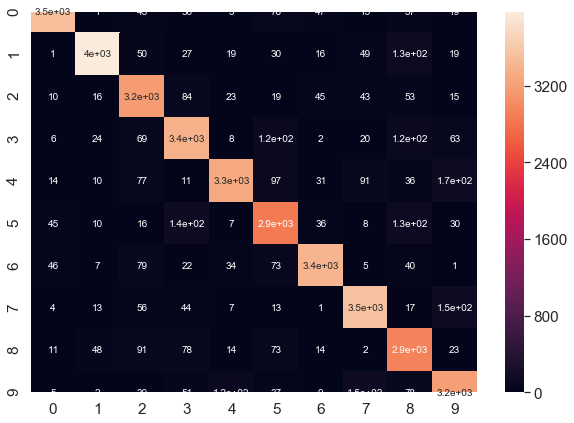

In [191]:
from sklearn.metrics import confusion_matrix

LR_prediction = LR.predict(X_test)
LR_confusion_matrix = confusion_matrix(LR_prediction, y_test)

LR_df_confusion_matrix = pd.DataFrame(LR_confusion_matrix, 
                                      range(10),
                                      range(10))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(LR_df_confusion_matrix, annot=True,annot_kws={"size": 10})# font size

plt.show()